https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

In [41]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [42]:
import pandas as pd 
fat = pd.read_csv('bodyfat.csv')

In [43]:
fat

,Unnamed: 0,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,248,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,249,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,250,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,251,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [44]:
fat = fat.drop('Unnamed: 0', axis=1)
fat.Weight = fat.Weight * 0.453592 # Convert to Kg
fat.Height = fat.Height * 0.0254 # convert inches to m
fat['BMI'] = fat.Weight / (fat.Height**2)

In [45]:
fat

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,69.966566,1.72085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.626779
1,1.0853,6.1,22,78.584814,1.83515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.334338
2,1.0414,25.3,22,69.853168,1.68275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.668737
3,1.0751,10.4,26,83.801122,1.83515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.883227
4,1.0340,28.7,24,83.574326,1.80975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.517358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,60.894726,1.70180,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,21.026290
248,1.0236,33.6,72,91.171992,1.77165,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,29.047288
249,1.0328,29.3,72,84.708306,1.67640,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,30.141905
250,1.0399,26.0,72,86.522674,1.79070,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.982629


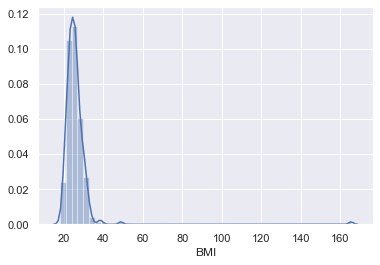

In [46]:
import seaborn as sns

sns.distplot(fat["BMI"], kde=True)

In [15]:
cfat = fat[fat['BMI'] <= 40].copy()

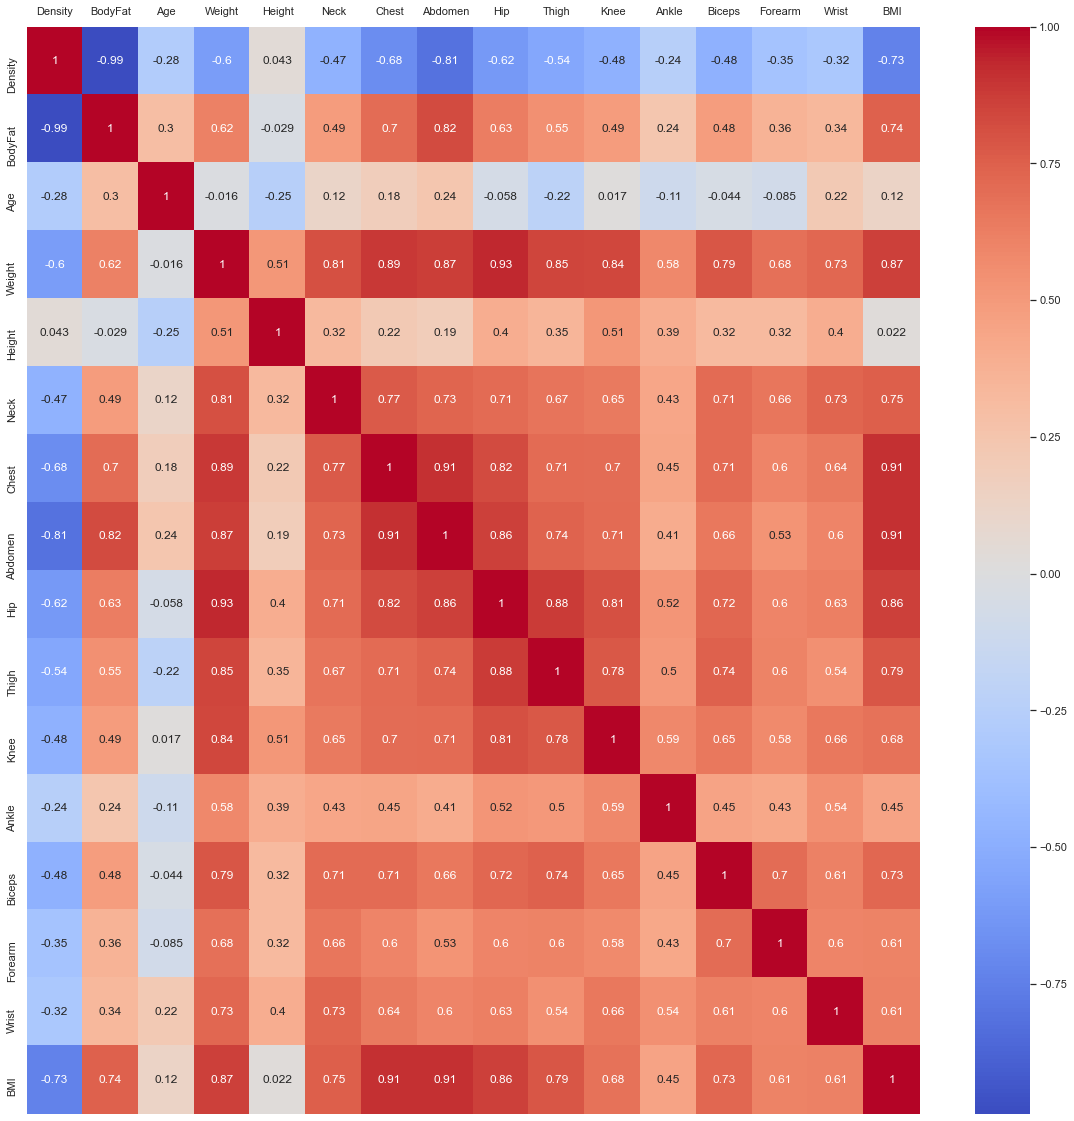

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# create correlation matrix
corr_matrix = cfat.corr()

# set figure size
fig, ax = plt.subplots(figsize=(20, 20))

# plot heatmap with annotations
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# move column labels to top
ax.tick_params(axis='x', labeltop=True, labelbottom=False)

# show plot
plt.show()




In [21]:
# fit a linear regression model of Density ~ BMI
bmi = smf.ols('Density ~ BMI', data=cfat).fit()
# print out the summary of the model
print(bmi.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     286.2
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           3.25e-43
Time:                        11:15:20   Log-Likelihood:                 734.17
No. Observations:                 250   AIC:                            -1464.
Df Residuals:                     248   BIC:                            -1457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1602      0.006    186.410      0.0

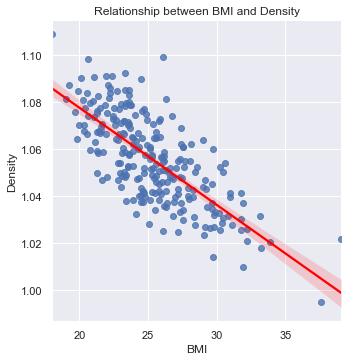

In [19]:
# create a scatterplot of Density vs BMI with the regression line overlaid
sns.lmplot(x='BMI', y='Density', data=cfat, line_kws={'color': 'red'})
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Relationship between BMI and Density')
plt.show()


In [22]:
allowed_factors = ['Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist']

# Forward Stepwise Feature Selection And Build Best Model Woith 5 Features 

In [23]:
len(cfat)

250

In [24]:
from sklearn.model_selection import train_test_split

# create training and test sets with 125 and 273 observations, respectively
train_fat, test_fat = train_test_split(cfat, test_size=.5, random_state=0)

# print the number of observations in each set
print('Number of observations in training set:', len(train_fat))
print('Number of observations in test set:', len(test_fat))

Number of observations in training set: 125
Number of observations in test set: 125


In [25]:
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Density~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

Age 0.11891818526391695
Weight 0.3118316510507495
Height 0.013604499535144865
Neck 0.2365970437510022
Chest 0.48319067404353544
Abdomen 0.6569981103212713
Hip 0.309611004446523
Thigh 0.20523437265112665
Knee 0.14348108465750464
Ankle 0.08478533257962217
Biceps 0.23065760452385642
Forearm 0.08974003323360791
Wrist 0.10016498175577282
best: ['Abdomen', 0.6569981103212713]


In [26]:
train_bmi1 = smf.ols(formula='Density ~ Abdomen', data=train_fat).fit()
print(train_bmi1.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     235.6
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           2.32e-30
Time:                        11:19:54   Log-Likelihood:                 380.21
No. Observations:                 125   AIC:                            -756.4
Df Residuals:                     123   BIC:                            -750.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1961      0.009    130.307      0.0

In [47]:
best_predictors = ['Abdomen']
best = ['', 0]
for p in allowed_factors:
    if p not in best_predictors:
        model  = smf.ols(formula='Density~' +  "+".join(best_predictors) + "+" +  p, data=train_fat).fit()
        print('Density~' +  "+".join(best_predictors) + "+" +  p, model.rsquared)
        if model.rsquared>best[1]:
                         best = [p, model.rsquared]
best_predictors.append(best[0])
print('best:',best_predictors)
train_bmi2 = smf.ols(formula='Density ~ ' + ' + '.join(best_predictors), data=train_fat).fit()
print(train_bmi2.summary())

Density~Abdomen+Age 0.6767891697428172
Density~Abdomen+Weight 0.7342533570852783
Density~Abdomen+Height 0.6957487405039489
Density~Abdomen+Neck 0.686436024838784
Density~Abdomen+Chest 0.6802570337998346
Density~Abdomen+Hip 0.7251825596255365
Density~Abdomen+Thigh 0.684182759661941
Density~Abdomen+Knee 0.6938357490638222
Density~Abdomen+Ankle 0.6848076731095345
Density~Abdomen+Biceps 0.6619154153686652
Density~Abdomen+Forearm 0.6753594262291778
Density~Abdomen+Wrist 0.7056567364984307
best: ['Abdomen', 'Weight']
                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     168.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           7.81e-36
Time:                        13:28:32   Log-Likelihood:                 396.16
No. Obser

In [30]:
best_predictors = ['Abdomen', 'Weight']
best = ['', 0]
for p in allowed_factors:
    if p not in best_predictors:
        model  = smf.ols(formula='Density~' +  "+".join(best_predictors) + "+" +  p, data=train_fat).fit()
        print('Density~' +  "+".join(best_predictors) + "+" +  p, model.rsquared)
        if model.rsquared>best[1]:
                         best = [p, model.rsquared]
best_predictors.append(best[0])
print('best:',best_predictors)
# build the final model with k=4 predictors using the best predictor set found above
train_bmi3 = smf.ols(formula='Density ~ ' + ' + '.join(best_predictors), data=train_fat).fit()

Density~Abdomen+Weight+Age 0.7349254365619351
Density~Abdomen+Weight+Height 0.734684186293059
Density~Abdomen+Weight+Neck 0.7350719549982647
Density~Abdomen+Weight+Chest 0.7361527870168976
Density~Abdomen+Weight+Hip 0.7403708948984322
Density~Abdomen+Weight+Thigh 0.7362390304684195
Density~Abdomen+Weight+Knee 0.7342618400367094
Density~Abdomen+Weight+Ankle 0.7350977707559923
Density~Abdomen+Weight+Biceps 0.7503664765897946
Density~Abdomen+Weight+Forearm 0.7354538938929442
Density~Abdomen+Weight+Wrist 0.7397169966040411
best: ['Abdomen', 'Weight', 'Biceps']


In [31]:
best_predictors = ['Abdomen', 'Weight', 'Biceps']
best = ['', 0]
for p in allowed_factors:
    if p not in best_predictors:
        model  = smf.ols(formula='Density~' +  "+".join(best_predictors) + "+" +  p, data=train_fat).fit()
        print('Density~' +  "+".join(best_predictors) + "+" +  p, model.rsquared)
        if model.rsquared>best[1]:
                         best = [p, model.rsquared]
best_predictors.append(best[0])
print('best:',best_predictors)
# build the final model with k=4 predictors using the best predictor set found above
train_bmi4 = smf.ols(formula='Density ~ ' + ' + '.join(best_predictors), data=train_fat).fit()

Density~Abdomen+Weight+Biceps+Age 0.7506619303391392
Density~Abdomen+Weight+Biceps+Height 0.7529942810139401
Density~Abdomen+Weight+Biceps+Neck 0.7548165068861956
Density~Abdomen+Weight+Biceps+Chest 0.7524724648219934
Density~Abdomen+Weight+Biceps+Hip 0.7552163201542643
Density~Abdomen+Weight+Biceps+Thigh 0.7506114284007719
Density~Abdomen+Weight+Biceps+Knee 0.7504200803560634
Density~Abdomen+Weight+Biceps+Ankle 0.752040382650131
Density~Abdomen+Weight+Biceps+Forearm 0.7505615613204154
Density~Abdomen+Weight+Biceps+Wrist 0.7586453452817188
best: ['Abdomen', 'Weight', 'Biceps', 'Wrist']


In [32]:
best_predictors = ['Abdomen', 'Weight', 'Biceps', 'Wrist']
best = ['', 0]
for p in allowed_factors:
    if p not in best_predictors:
        model  = smf.ols(formula='Density~' +  "+".join(best_predictors) + "+" +  p, data=train_fat).fit()
        print('Density~' +  "+".join(best_predictors) + "+" +  p, model.rsquared)
        if model.rsquared>best[1]:
                         best = [p, model.rsquared]
best_predictors.append(best[0])
print('best:',best_predictors)
# build the final model with k=4 predictors using the best predictor set found above
train_bmi5 = smf.ols(formula='Density ~ ' + ' + '.join(best_predictors), data=train_fat).fit()

Density~Abdomen+Weight+Biceps+Wrist+Age 0.7595234065705847
Density~Abdomen+Weight+Biceps+Wrist+Height 0.7611915781926621
Density~Abdomen+Weight+Biceps+Wrist+Neck 0.7603260252068308
Density~Abdomen+Weight+Biceps+Wrist+Chest 0.7600204027067001
Density~Abdomen+Weight+Biceps+Wrist+Hip 0.7676364281658217
Density~Abdomen+Weight+Biceps+Wrist+Thigh 0.7586895378986833
Density~Abdomen+Weight+Biceps+Wrist+Knee 0.7589880040835748
Density~Abdomen+Weight+Biceps+Wrist+Ankle 0.7628371844347706
Density~Abdomen+Weight+Biceps+Wrist+Forearm 0.7586455431260074
best: ['Abdomen', 'Weight', 'Biceps', 'Wrist', 'Hip']


Density ~ Abdomen
Density ~ Abdomen + Weight
Density ~ Abdomen + Weight + Biceps
Density ~ Abdomen + Weight + Biceps + Wrist
Density ~ Abdomen + Weight + Biceps + Wrist + Hip


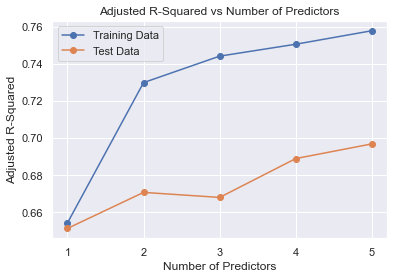

In [33]:
# create lists to store adjusted R-squared values for each model
adjr2_train = []
adjr2_test = []

# loop over the number of predictors (1 to 5)
for k in range(1, 6):
    # fit a linear regression model using the current set of predictors
    predictors = best_predictors[:k]
    formula = 'Density ~ ' + ' + '.join(predictors)
    print(formula)
    train_model = smf.ols(formula=formula, data=train_fat).fit()
    test_model = smf.ols(formula=formula, data=test_fat).fit()
    
    # calculate the adjusted R-squared value and append it to the lists
    adjr2_train.append(train_model.rsquared_adj)
    adjr2_test.append(test_model.rsquared_adj)

# plot adjusted R-squared values vs number of predictors
plt.plot(range(1,6), adjr2_train, '-o', label='Training Data')
plt.plot(range(1,6), adjr2_test, '-o', label='Test Data')
plt.xlabel('Number of Predictors')
plt.ylabel('Adjusted R-Squared')
plt.title('Adjusted R-Squared vs Number of Predictors')
plt.xticks(range(1,6))
plt.legend()
plt.show()
